In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import math

In [2]:
def filtered_by_position(df, position):
    return df[df.Pos == position]

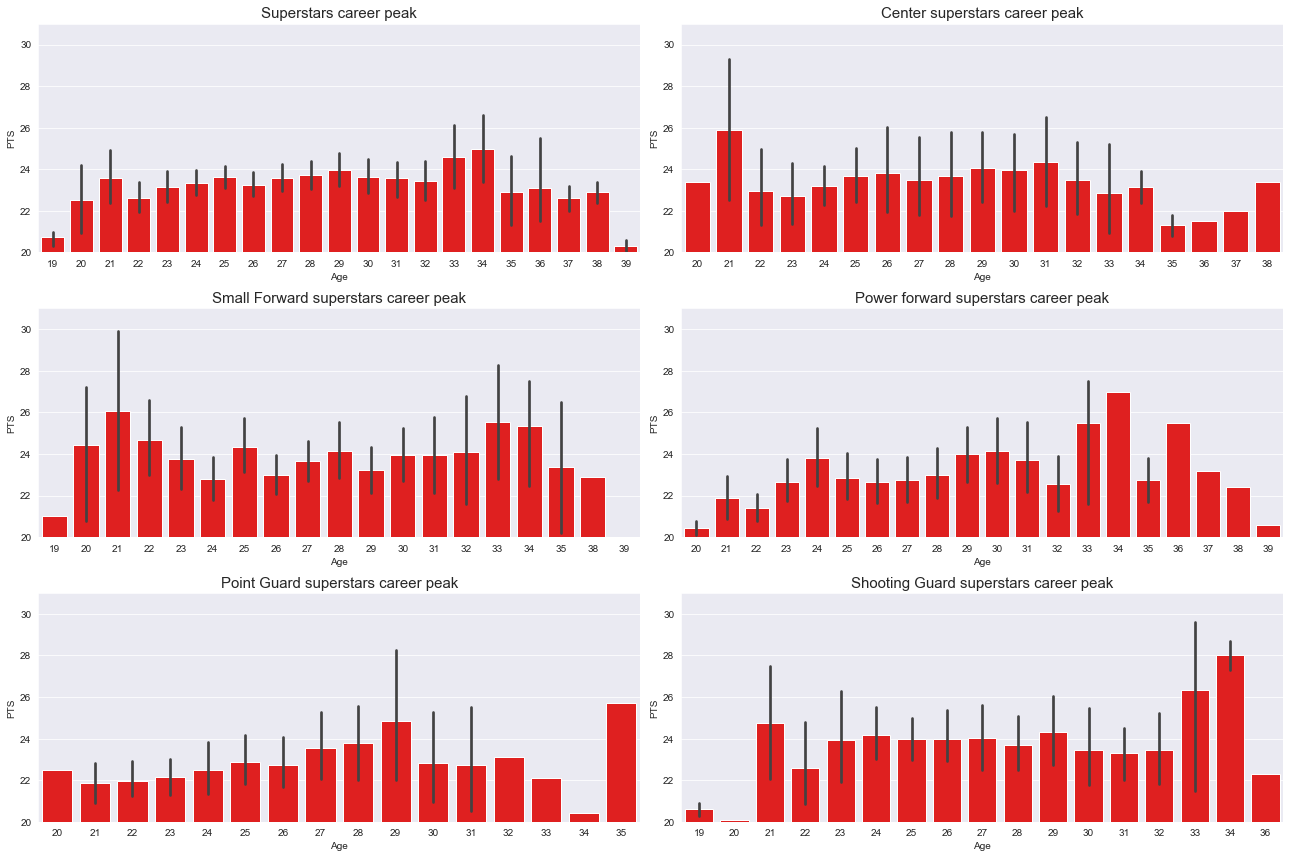

In [4]:
per_game = pd.read_csv('per_game.csv')
per_game = per_game[(per_game['PTS']>=20) & (per_game['Pos'].str.len() <= 2)] 
per_game = per_game.replace({'Pos': {'PG': 'Point Guard', 
                                     'SG': 'Shooting Guard', 
                                     'SF': 'Small Forward',
                                     'PF': 'Power forward', 
                                     'C': 'Center'}})

positions = per_game['Pos'].unique().tolist()

plt.figure(figsize=(18,12))
plt.subplot(3,2,1)
plt.title("Superstars career peak", fontdict={'fontsize': 15})
fig1 = sns.barplot(x=per_game['Age'], y=per_game['PTS'], color='red')
plt.ylim(20,31)
plt.xlim=(18,40)

index = 2
for position in positions:
    plt.subplot(3,2,index)
    plt.title('{} superstars career peak'.format(position), fontsize=15)
    df = filtered_by_position(per_game, position)
    fig1 = sns.barplot(x=df['Age'].astype(int), y=df['PTS'], color='red')
    plt.ylim(20,31)
    plt.xlim=(18,40)
    index += 1

fig1 = sns.set_style('darkgrid')
plt.tight_layout(pad=1)

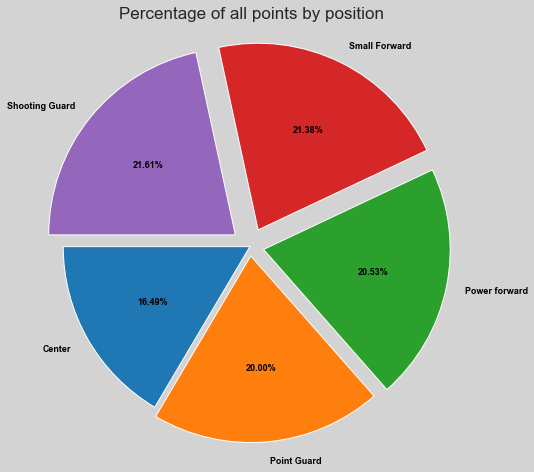

In [5]:
totals = pd.read_csv('season_totals.csv')

grouped_by_possition = pd.DataFrame(totals.groupby('Pos')['PTS'].agg(sum), index = totals['Pos']).drop_duplicates()
grouped_by_possition = grouped_by_possition[grouped_by_possition.index.str.len() <= 2]
grouped_by_possition = grouped_by_possition.rename(index={'PG': 'Point Guard', 
                                                          'SG': 'Shooting Guard', 
                                                          'SF': 'Small Forward',
                                                          'PF': 'Power forward', 
                                                          'C': 'Center'})
explode = [0,0.05,0.075,0.1,0.1]

plt.title('Percentage of all points by position', fontsize=17)
fig2 = plt.gcf()
fig2.set_size_inches(8,8)
fig2.set_facecolor('lightgrey')
plt.pie(grouped_by_possition['PTS'].tolist(), 
        labels=grouped_by_possition.index.tolist(), 
        autopct='%1.2f%%', 
        explode=explode, 
        startangle=180, 
        textprops={'weight':'bold', 
                   'fontsize': 9,
                   'color': 'black'})
plt.axis('equal')
plt.show(block=False)

In [6]:
df = pd.read_csv('countries.csv')

players_map = folium.Map(location=[56,24], zoom_start=3)
folium.Choropleth(
    geo_data='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json',
    name='NBA players exept USA',
    data=df,
    nan_fill_color='white',
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    legend_name = 'Players per country',
    highlight=True
).add_to(players_map)
folium.LayerControl().add_to(players_map)
players_map.save('Players_per_country.html')

https://aja-l.github.io/python/classD

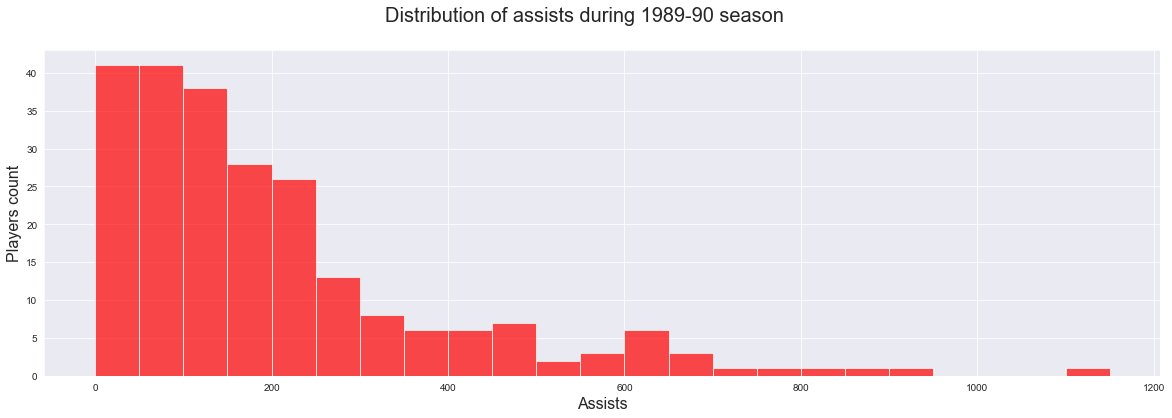

In [7]:
totals_by_seasons = pd.read_csv('season_totals.csv')
totals_by_seasons = totals_by_seasons.iloc[:, [1, 16]]
df = totals_by_seasons.copy()
df['AST'] = df.groupby('Season')['AST'].transform('sum')

df = df.drop_duplicates()
df = totals_by_seasons.loc[(totals_by_seasons.Season == totals_by_seasons.loc[df['AST'].idxmax()].Season) & 
                           (totals_by_seasons.AST > 0)]

bins_lst = np.arange(0, int(math.ceil(df['AST'].max() / 100.0))* 100 , 50).tolist()
plt.figure(figsize=(20,6))
plt.suptitle('Distribution of assists during {} season'.format(df.loc[df['AST'].idxmax()].Season), 
          fontsize=20)

fig3 = sns.distplot(df['AST'], 
                    kde=False, 
                    bins=bins_lst, 
                    hist_kws={'histtype': 'bar',
                              'alpha': 0.7, 
                              'color': 'r'})
plt.xlabel('Assists', fontsize=16)
plt.ylabel('Players count', fontsize=16)
fig3

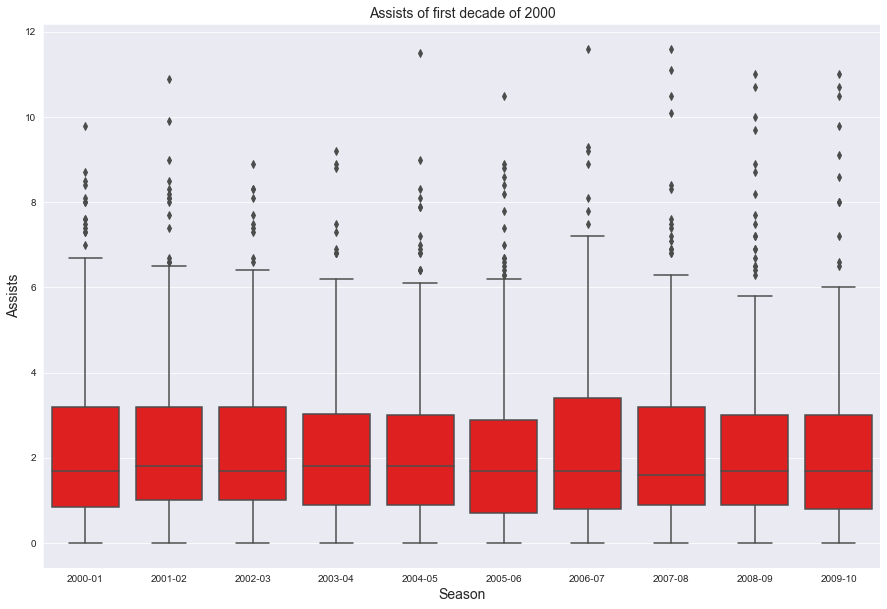

In [8]:
assists_of_00_decade = pd.read_csv('per_game.csv')
assists_of_00_decade = assists_of_00_decade[['Season', 'AST']]
assists_of_00_decade = assists_of_00_decade.loc[(assists_of_00_decade['Season'].str[:3] == '200')]

plt.figure(figsize=(15,10))
plt.title('Assists of first decade of 2000', fontsize=14)
fig4 = sns.boxplot(x=assists_of_00_decade['Season'], y=assists_of_00_decade['AST'], color='red')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Assists', fontsize=14)
fig4

In [9]:
players = ['Kobe Bryant', 'LeBron James', 'Michael Jordan'] #, 'James Harden', 'Magic Johnson'
names = pd.read_csv('all_players.csv')
per_36_min = pd.read_csv('per_36_min.csv')

names.set_index('Player_idx')
per_36_min.set_index('Player_idx')

names = names[names['Player'].isin(players)]
colums_per_36_min = ['Player_idx', 'Age', 'FG%', 'PTS', 'AST', 'STL', 'TOV']

per_36_min = per_36_min[colums_per_36_min].merge(names[['Player_idx', 'Player']], 
                                                 how='inner', 
                                                 left_on='Player_idx', 
                                                 right_on = 'Player_idx')
per_36_min.columns = ['Index', 'Age', 'Field goals %', 'Points', 'Assists', 'Steals', 'Turnovers', 'Player name']

per_36_min = per_36_min.loc[(per_36_min['Age'] >= 21) & (per_36_min['Age'] <= 34)]

In [10]:
def create_plot(df, players_lst, column):
    fig = plt.figure()
    for player in players_lst:
        filtered_df = df.loc[df['Player name'] == player]
        fig = sns.lineplot(x=df.loc[df['Player name'] == player]['Age'], 
                           y=df.loc[df['Player name'] == player][column],
                           label=player,#s=125
                           markers=True, 
                           linewidth=3,
                           marker='o')
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return fig

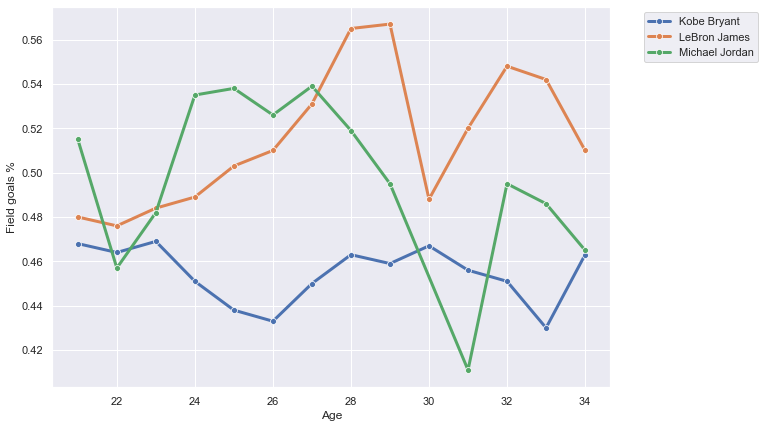

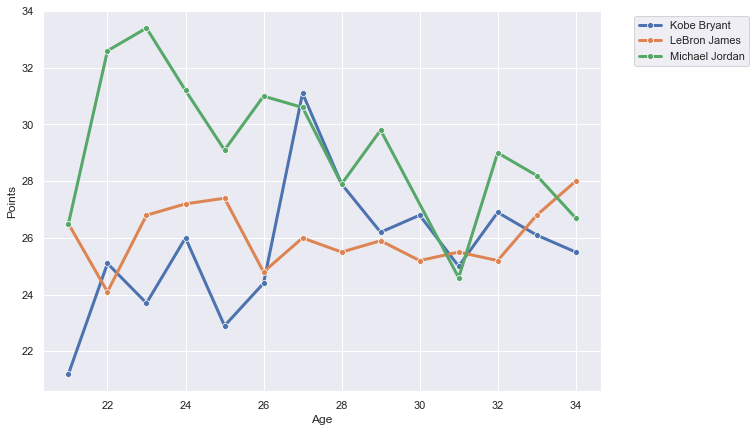

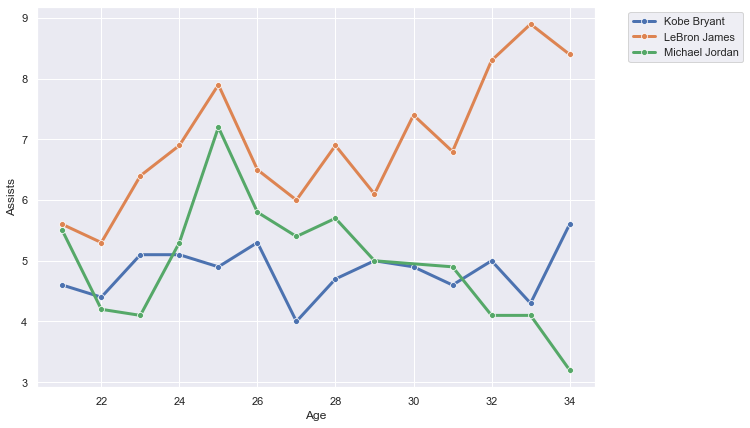

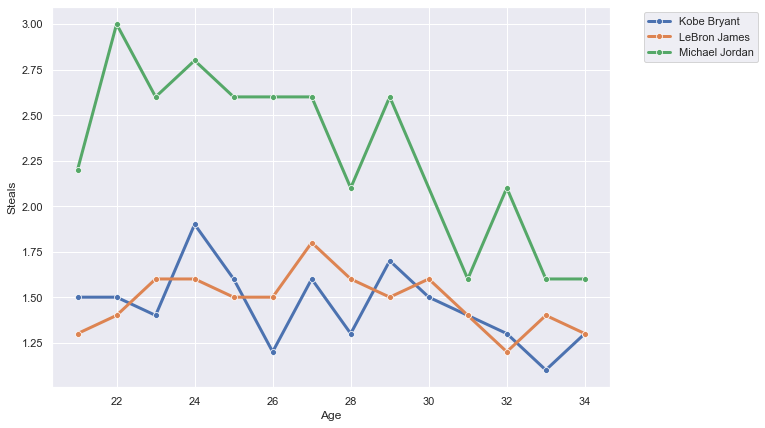

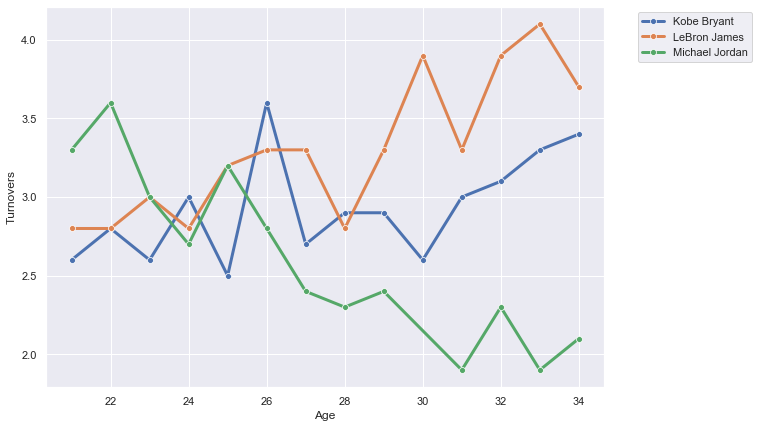

In [11]:
sns.set(rc={'figure.figsize':(10,7)})
fig5 = create_plot(per_36_min, players, 'Field goals %')
fig6 = create_plot(per_36_min, players, 'Points')
fig7 = create_plot(per_36_min, players, 'Assists')
fig8 = create_plot(per_36_min, players, 'Steals')
fig9 = create_plot(per_36_min, players, 'Turnovers')